<a href="https://colab.research.google.com/github/nguyenminhkhuong/machine_learning/blob/main/Validation_and_Test_Sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")


In [3]:
scale_factor = 1000.0

train_df['median_house_value'] /= scale_factor
test_df['median_house_value'] /= scale_factor

In [4]:
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model


def train_model(model, df, feature, label, my_epochs,
                my_batch_size=None, my_validation_split=0.1):
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)
  
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch

  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history

print("Defined the build_model and train_model functions.")  

Defined the build_model and train_model functions.


In [5]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Trainging Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()

  merged_mae_list = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_list)
  lowest_loss = min(merged_mae_list)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)

  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()

print("Defined the plot_the_loss_curve function.")  

Defined the plot_the_loss_curve function.


Epoch 1/30
167/167 [==============================] - 0s 2ms/step - loss: 43189.9805 - root_mean_squared_error: 207.8220 - val_loss: 9107.5381 - val_root_mean_squared_error: 95.4334
Epoch 2/30
167/167 [==============================] - 0s 922us/step - loss: 22013.8320 - root_mean_squared_error: 148.3706 - val_loss: 3319.8394 - val_root_mean_squared_error: 57.6180
Epoch 3/30
167/167 [==============================] - 0s 925us/step - loss: 10334.6094 - root_mean_squared_error: 101.6593 - val_loss: 2556.7224 - val_root_mean_squared_error: 50.5640
Epoch 4/30
167/167 [==============================] - 0s 903us/step - loss: 7169.7305 - root_mean_squared_error: 84.6743 - val_loss: 3429.3250 - val_root_mean_squared_error: 58.5604
Epoch 5/30
167/167 [==============================] - 0s 890us/step - loss: 7087.6895 - root_mean_squared_error: 84.1884 - val_loss: 3335.7817 - val_root_mean_squared_error: 57.7562
Epoch 6/30
167/167 [==============================] - 0s 856us/step - loss: 7087.0918 

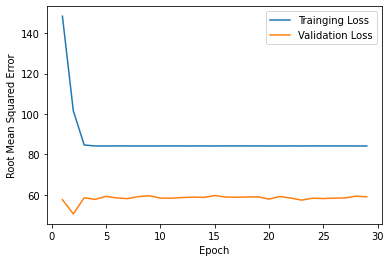

In [6]:
learning_rate = 0.08
epochs = 30
batch_size = 100

validation_split = 0.02

my_feature = "median_income"
my_label = "median_house_value"

my_model = None
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, my_label,
                                    epochs, batch_size, validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"],
                    history["val_root_mean_squared_error"])

In [7]:
train_df.head(n=1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.1,32.5,8.0,6533.0,1217.0,4797.0,1177.0,4.0,144.4
996,-117.1,34.6,6.0,5110.0,1044.0,1938.0,724.0,3.2,112.8
997,-117.1,34.2,22.0,4397.0,931.0,1145.0,445.0,4.5,108.4
998,-117.1,34.0,24.0,4144.0,826.0,2127.0,772.0,2.5,96.0


Epoch 1/70
136/136 [==============================] - 0s 2ms/step - loss: 43798.6953 - root_mean_squared_error: 209.2814 - val_loss: 32478.1484 - val_root_mean_squared_error: 180.2169
Epoch 2/70
136/136 [==============================] - 0s 1ms/step - loss: 25657.5977 - root_mean_squared_error: 160.1799 - val_loss: 17944.4941 - val_root_mean_squared_error: 133.9571
Epoch 3/70
136/136 [==============================] - 0s 1ms/step - loss: 13852.2109 - root_mean_squared_error: 117.6954 - val_loss: 9525.1992 - val_root_mean_squared_error: 97.5971
Epoch 4/70
136/136 [==============================] - 0s 1ms/step - loss: 8071.4746 - root_mean_squared_error: 89.8414 - val_loss: 6841.5898 - val_root_mean_squared_error: 82.7139
Epoch 5/70
136/136 [==============================] - 0s 1ms/step - loss: 7069.8447 - root_mean_squared_error: 84.0824 - val_loss: 6814.3413 - val_root_mean_squared_error: 82.5490
Epoch 6/70
136/136 [==============================] - 0s 956us/step - loss: 7064.9775 - ro

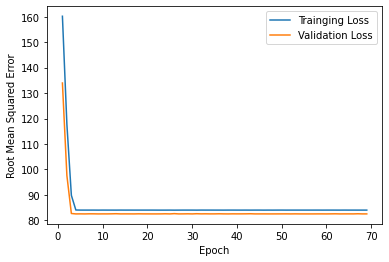

In [17]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 70
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.2

# Identify the feature and the label.
my_feature="median_income"  # the median income on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# Shuffle the examples.
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index)) 

# Invoke the functions to build and train the model. Train on the shuffled
# training set.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [18]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 854us/step - loss: 7018.6001 - root_mean_squared_error: 83.7771
